In [1]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [4]:
vowel = 'a'
test_audio_path = f'HC/HC22/22_a.wav'

In [5]:
y, sr = librosa.load(test_audio_path, sr=16000)
print(sr)

16000


In [6]:
y, sr = librosa.load(test_audio_path, sr=16000)
hop_length = 512
n_fft = 1024
n_mels = 128
fmin = 0
fmax = sr/2

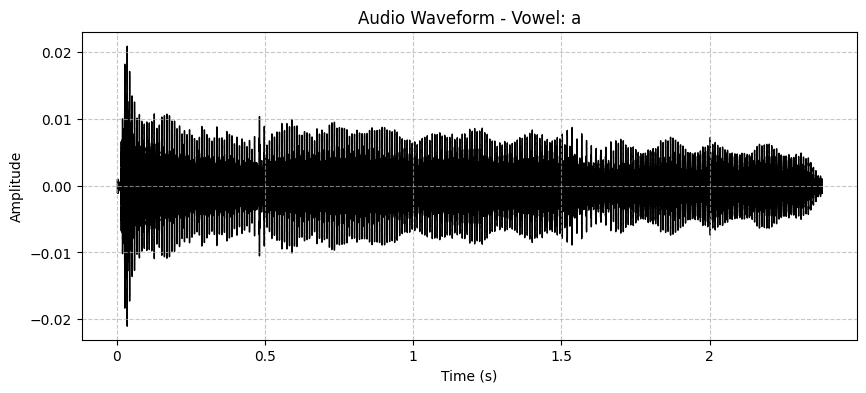

In [35]:
# Plot the waveform
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
librosa.display.waveshow(y, sr=sr, color='black')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform - Vowel: a')

plt.grid(True, linestyle='--', alpha=0.7)

waveform_output_path = os.path.join(f'{vowel}_waveform.svg')
plt.savefig(waveform_output_path, format='svg')

# Display the plot
plt.show()


In [30]:
# 1. Log-Mel Spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length, n_fft=n_fft, n_mels=n_mels, fmin=fmin, fmax=4000)
log_mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

log_mel_output_path = os.path.join(f'{vowel}_log_mel_spectrogram.svg')
plt.figure(figsize=(6, 6))

librosa.display.specshow(log_mel_spec_db, cmap='magma', sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')

# Add labels for the x and y axes
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.title('Log-Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')  # This adds numeric values to the colorbar
plt.savefig(log_mel_output_path, format='svg')
plt.close()
#CQT spectrogram
cqt = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr, hop_length=hop_length)), ref=np.max)
cqt_spectrogram_output_path = os.path.join(f'{vowel}_cqt_spectrogram.svg')
plt.figure(figsize=(6, 6))
librosa.display.specshow(cqt, cmap='magma', sr=sr, hop_length=hop_length, x_axis='time', y_axis='cqt_hz')

# Add labels for the x and y axes
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.title('Constant-Q Transform (CQT)')
plt.colorbar(format='%+2.0f')
plt.savefig(cqt_spectrogram_output_path, format='svg')
plt.close()

# 4. Spectral Contrast
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, hop_length=hop_length, n_fft=n_fft)
spectral_contrast_output_path = os.path.join(f'{vowel}_spectral_contrast.svg')
plt.figure(figsize=(6, 6))

# Calculate time values for x-axis
time_values = librosa.times_like(spectral_contrast)

librosa.display.specshow(spectral_contrast, cmap='inferno', sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')

# Add labels for the x and y axes
plt.xlabel('Time (s)')
plt.ylabel('Frequency Bands')

plt.title('Spectral Contrast')
plt.colorbar(format='%+2.0f')  # This adds numeric values to the colorbar
plt.savefig(spectral_contrast_output_path, format='svg')
plt.close()
# 2. MFCC (Mel-Frequency Cepstral Coefficients)
# mfccs = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_fft=n_fft, n_mfcc=13, fmin=fmin, fmax=fmax)
# mfcc_output_path = os.path.join(f'{vowel}_mfcc.png')

# librosa.display.specshow(mfccs, cmap='viridis')
# plt.title('MFCC')
# plt.savefig(mfcc_output_path)
# plt.close()

# 3. Chromagram
# chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length, n_fft=n_fft)
# chroma_output_path = os.path.join(f'{vowel}_chromagram.png')

# librosa.display.specshow(chromagram, cmap='coolwarm')
# plt.title('Chromagram')
# plt.savefig(chroma_output_path)
# plt.close()


# 5. Zero Crossing Rate
# zero_crossings = librosa.feature.zero_crossing_rate(y=y, hop_length=hop_length)
# zero_crossings_output_path = os.path.join(f'{vowel}_zero_crossings.png')

# librosa.display.specshow(zero_crossings, cmap='gray_r')
# plt.title('Zero Crossing Rate')
# plt.savefig(zero_crossings_output_path)
# plt.close()

# Standard Spectrogram
# stft = np.abs(librosa.stft(y, hop_length=hop_length, n_fft=n_fft))
# log_stft = librosa.amplitude_to_db(stft, ref=np.max)

# librosa.display.specshow(log_stft, cmap='magma')
# log_stft_output_path = os.path.join(f'{vowel}_log_stft_spectrogram.png')
# plt.title('Log-STFT Spectrogram')
# plt.savefig(log_stft_output_path)
# plt.close()



In [19]:
def generate_and_save_spectrograms(audio_path, output_dir):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=16000)
    audio_filename = os.path.splitext(os.path.basename(audio_path))[0]

    hop_length = 512
    n_fft = 1024
    n_mels = 128
    fmin = 0
    fmax = 4000

    # 1. log-Mel Spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length, n_fft=n_fft, n_mels=n_mels, fmin=fmin, fmax=fmax)
    log_mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    librosa.display.specshow(log_mel_spec_db, cmap='plasma')
    log_mel_output_path = os.path.join(output_dir, f'{audio_filename}_log_mel_spectrogram.png')
    plt.savefig(log_mel_output_path)
    plt.close()
    print(f"Log mel saved for {audio_path}")

    #2, CQT
    cqt = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr, hop_length=hop_length)), ref=np.max)
    librosa.display.specshow(cqt, cmap='plasma', sr=sr, hop_length=hop_length)
    cqt_spectrogram_output_path = os.path.join(output_dir, f'{audio_filename}_cqt_spectrogram.png')
    plt.savefig(cqt_spectrogram_output_path)
    plt.close()
    print(f"CQT saved for {audio_path}")

    # 4. Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, hop_length=hop_length, n_fft=n_fft)
    librosa.display.specshow(spectral_contrast, cmap='plasma')
    spectral_contrast_output_path = os.path.join(output_dir, f'{audio_filename}_spectral_contrast.png')
    plt.savefig(spectral_contrast_output_path)
    plt.close()

    print(f"Spectral saved for {audio_path}")

input_file_path = 'path_lists/VOICED_ill_a_list.txt'
output_directory = 'VOICED_a/ill'

# input_file_path = 'txt_lists/SVD_ill_a_list.txt'
# output_directory = 'SVD_a/ill'

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

with open(input_file_path, 'r') as file:
    audio_paths = file.read().splitlines()

for audio_path in audio_paths:
    generate_and_save_spectrograms(audio_path, output_directory)

Log mel saved for VOICED/ill/voice001.wav
CQT saved for VOICED/ill/voice001.wav
Spectral saved for VOICED/ill/voice001.wav
Log mel saved for VOICED/ill/voice003.wav
CQT saved for VOICED/ill/voice003.wav
Spectral saved for VOICED/ill/voice003.wav
Log mel saved for VOICED/ill/voice004.wav
CQT saved for VOICED/ill/voice004.wav
Spectral saved for VOICED/ill/voice004.wav
Log mel saved for VOICED/ill/voice005.wav
CQT saved for VOICED/ill/voice005.wav
Spectral saved for VOICED/ill/voice005.wav
Log mel saved for VOICED/ill/voice006.wav
CQT saved for VOICED/ill/voice006.wav
Spectral saved for VOICED/ill/voice006.wav
Log mel saved for VOICED/ill/voice007.wav
CQT saved for VOICED/ill/voice007.wav
Spectral saved for VOICED/ill/voice007.wav
Log mel saved for VOICED/ill/voice008.wav
CQT saved for VOICED/ill/voice008.wav
Spectral saved for VOICED/ill/voice008.wav
Log mel saved for VOICED/ill/voice009.wav
CQT saved for VOICED/ill/voice009.wav
Spectral saved for VOICED/ill/voice009.wav
Log mel saved fo